In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anshtanwar/pets-facial-expression-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pets-facial-expression-dataset


In [4]:
import os

path_2 = os.path.join(path, "Master Folder")

train_dir = os.path.join(path, "Master Folder", "train")
val_dir = os.path.join(path, "Master Folder", "valid")
test_dir = os.path.join(path, "Master Folder", "test")


In [ ]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

# Define the transformations (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224 for VGG16 input
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet mean
                         std=[0.229, 0.224, 0.225]),  # ImageNet std
])

# Path where the dataset is saved (replace this with the correct path)
dataset_path = path_2  # Update this to the dataset path

# Load the dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# DataLoader to process the dataset in batches
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Load pre-trained VGG16 model
model = models.vgg16(pretrained=True)

# Modify the final fully connected layer to match the number of classes in your dataset
num_classes = len(dataset.classes)  # Number of classes in your dataset
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Example training loop (simplified)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track accuracy
        _, predicted = torch.max(outputs, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        running_loss += loss.item()

    # Print loss and accuracy for the current epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct_predictions / total_predictions:.2f}%")


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()


model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4, activation='softmax'))  # Custom output classes


model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))



model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,686,852 (509.97 MB)

 Trainable params: 133,686,852 (509.97 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)


Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=4,
    min_lr=1e-6,
    verbose=1
)

model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.2619 - loss: 1.3863
Epoch 1: val_accuracy improved from -inf to 0.30556, saving model to best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 912ms/step - accuracy: 0.2617 - loss: 1.3863 - val_accuracy: 0.3056 - val_loss: 1.3858
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.2526 - loss: 1.3864
Epoch 2: val_accuracy did not improve from 0.30556
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.2525 - loss: 1.3864 - val_accuracy: 0.3056 - val_loss: 1.3854
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.2478 - loss: 1.3860
Epoch 3: val_accuracy did not improve from 0.30556
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.2479 - loss: 1.3860 - val_accuracy: 0.3056 - val_loss: 1.3827
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.2657 - loss: 1.3859
Epoch 4: val_accuracy did not improve from 0.30556
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.2655 - loss: 1.3859 - val_accuracy: 0.3056 - val_loss: 1.3849
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.2438 - loss: 1.3862
Epoch 5: val_accuracy did not i

63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 569ms/step - accuracy: 0.2472 - loss: 1.3866 - val_accuracy: 0.3333 - val_loss: 1.3851
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.2752 - loss: 1.3858
Epoch 9: val_accuracy did not improve from 0.33333
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - accuracy: 0.2750 - loss: 1.3858 - val_accuracy: 0.3333 - val_loss: 1.3841
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.2652 - loss: 1.3855
Epoch 10: val_accuracy did not improve from 0.33333
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.2652 - loss: 1.3855 - val_accuracy: 0.3056 - val_loss: 1.3804
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.2590 - loss: 1.3857
Epoch 11: val_accuracy did not improve from 0.33333
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.2591 - loss: 1.3857 - val_accuracy: 0.3056 - val_loss: 1.3802
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.2553 - loss: 1.3837
Epoch 12: val_accuracy did

63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 528ms/step - accuracy: 0.3054 - loss: 1.3622 - val_accuracy: 0.3611 - val_loss: 1.3227
Epoch 17/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.3473 - loss: 1.3548
Epoch 17: val_accuracy did not improve from 0.36111
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.3471 - loss: 1.3548 - val_accuracy: 0.2778 - val_loss: 1.3310
Epoch 18/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.3459 - loss: 1.3554
Epoch 18: val_accuracy did not improve from 0.36111
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.3461 - loss: 1.3552 - val_accuracy: 0.3611 - val_loss: 1.3456
Epoch 19/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.3566 - loss: 1.3207
Epoch 19: val_accuracy did not improve from 0.36111
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.3563 - loss: 1.3212 - val_accuracy: 0.3611 - val_loss: 1.3523
Epoch 20/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.3442 - loss: 1.3510
Epoch 20: val_accuracy d

63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 555ms/step - accuracy: 0.3782 - loss: 1.3253 - val_accuracy: 0.3889 - val_loss: 1.3556
Epoch 25/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.3552 - loss: 1.3220
Epoch 25: val_accuracy improved from 0.38889 to 0.41667, saving model to best_model.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 471ms/step - accuracy: 0.3554 - loss: 1.3218 - val_accuracy: 0.4167 - val_loss: 1.4254
Epoch 26/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.3728 - loss: 1.3230
Epoch 26: val_accuracy did not improve from 0.41667
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.3726 - loss: 1.3230 - val_accuracy: 0.3333 - val_loss: 1.3787
Epoch 27/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.4044 - loss: 1.3187
Epoch 27: val_accuracy did not improve from 0.41667
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.4040 - loss: 1.3188 - val_accuracy: 0.3889 - val_loss: 1.3949
Epoch 28/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.3840 - loss: 1.3015
Epoch 28: val_accuracy did not improve from 0.41667
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.3841 - loss: 1.3015 - val_accuracy: 0.3333 - val_loss: 1.3856
Epoch 29/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.3696 - loss: 1.3034
Epoch 29: val_accuracy d

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

model.evaluate(test_generator)


Found 38 images belonging to 4 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3849 - loss: 1.3347


[1.3341073989868164, 0.3947368562221527]

In [10]:
import numpy as np

# Get predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Accuracy: 0.3947
Classification Report:
              precision    recall  f1-score   support

       Angry       0.32      0.60      0.41        10
       Other       0.17      0.17      0.17         6
         Sad       1.00      0.09      0.17        11
       happy       0.58      0.64      0.61        11

    accuracy                           0.39        38
   macro avg       0.52      0.37      0.34        38
weighted avg       0.57      0.39      0.36        38

Confusion Matrix:
[[6 2 0 2]
 [4 1 0 1]
 [6 2 1 2]
 [3 1 0 7]]


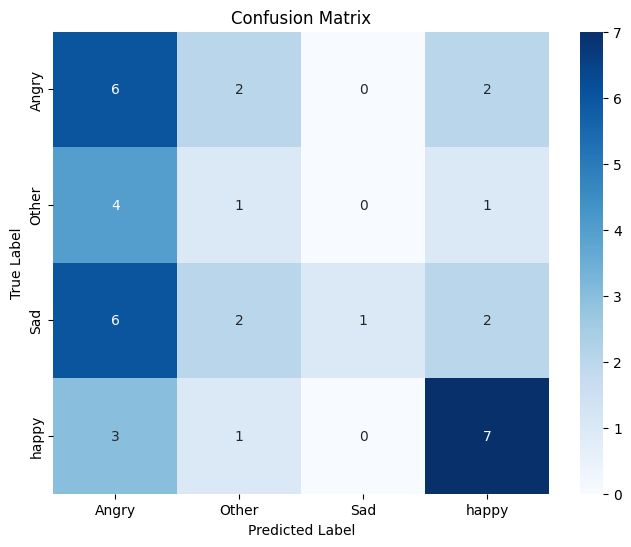

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
